In [1]:
import time
start_time=time.time()

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import sys
import os
from PIL import Image
import seaborn as sns
from scipy import interpolate
from sabreMod import sosf,sosfn
import json
import strucfunc
import turbustat.statistics as tss
plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

Brillo emisión

Text(0.5, 1.0, 'H$_{α}$ Flux')

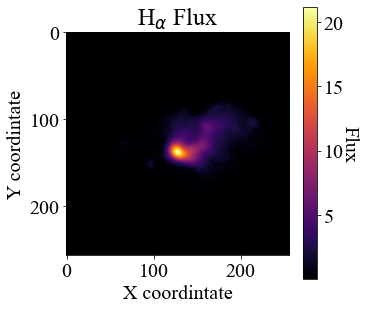

In [3]:
#ARCHIVO
FitsFile= 'Obs/TAURUS.HV.Ha.Peak'
hdul=fits.open(FitsFile + '.fits')
fig, ax = plt.subplots(figsize=(5, 5))


image_data=hdul[0].data
plt.imshow(image_data, cmap='inferno')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
cbar = plt.colorbar()
cbar.set_label('Flux', rotation=270, labelpad=15)  
plt.title('H$_{α}$ Flux')

In [4]:
#TABLA DATOS
flx=hdul[0].data
df=pd.DataFrame(flx)
dffx=df.stack().reset_index().rename(columns={'level_0':'Y', 'level_1':'X', 0:'I'})
dffx.describe()

,Y,X,I
count,65536.000000,65536.000000,6.553600e+04
mean,127.500000,127.500000,3.528891e-01
std,73.900834,73.900834,1.449902e+00
min,0.000000,0.000000,5.289438e-09
25%,63.750000,63.750000,5.289438e-09
50%,127.500000,127.500000,5.289438e-09
75%,191.250000,191.250000,5.289438e-09
max,255.000000,255.000000,2.115935e+01


Velocidad Radial

Text(0.5, 1.0, 'H$_{α}$ Radial Velocity')

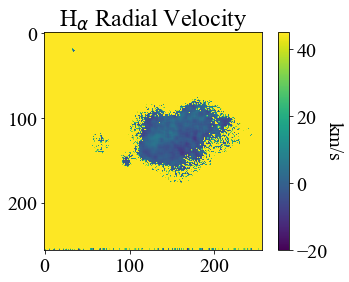

In [5]:
#ARCHIVO
FitsFile= FitsFile= 'Obs/TAURUS.HV.Ha.RV'
#FitsFile= 'n604halphasigma'
hdul=fits.open(FitsFile + '.fits')
#IMAGEN
image_data=hdul[0].data
plt.imshow(image_data, cmap='viridis')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
cbar = plt.colorbar()
cbar.set_label('km/s', rotation=270, labelpad=15)  
plt.clim(-20,45) 
plt.title('H$_{α}$ Radial Velocity')
#plt.savefig('TAURUS/'+reg+'RVH.png')

In [6]:
#TABLA DATOS
vel=hdul[0].data
df=pd.DataFrame(vel)
dfvr=df.stack().reset_index().rename(columns={'level_0':'Y', 'level_1':'X', 0:'RV'})
dfvr.describe()

,Y,X,RV
count,65536.000000,65536.000000,65536.000000
mean,127.500000,127.500000,108.074671
std,73.900834,73.900834,40.049776
min,0.000000,0.000000,-15.575094
25%,63.750000,63.750000,122.940002
50%,127.500000,127.500000,122.940002
75%,191.250000,191.250000,122.940002
max,255.000000,255.000000,126.898609


In [7]:
data=dfvr
data['I']=dffx.I
data.describe()

,Y,X,RV,I
count,65536.000000,65536.000000,65536.000000,6.553600e+04
mean,127.500000,127.500000,108.074671,3.528891e-01
std,73.900834,73.900834,40.049776,1.449902e+00
min,0.000000,0.000000,-15.575094,5.289438e-09
25%,63.750000,63.750000,122.940002,5.289438e-09
50%,127.500000,127.500000,122.940002,5.289438e-09
75%,191.250000,191.250000,122.940002,5.289438e-09
max,255.000000,255.000000,126.898609,2.115935e+01


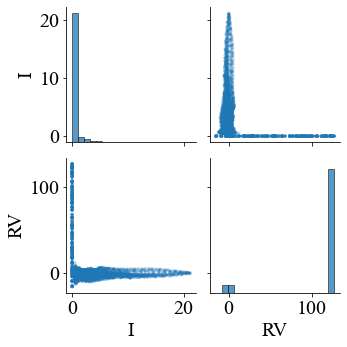

In [8]:
sns.pairplot(data, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

Ajuste de datos

In [9]:
mI=(data.I>data.I.mean()+0.5*data.I.std())&(data.X>109)
data=data[mI]

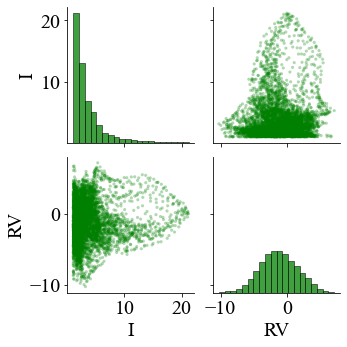

In [10]:
sns.pairplot(data, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none',color='green'),
             diag_kws=dict(bins=20, color="green"),
            )

#plt.savefig('TAURUS/'+reg+'CorrlHA.png')

In [11]:
data.describe()

,Y,X,RV,I
count,5832.000000,5832.000000,5832.000000,5832.000000
mean,120.644719,159.083162,-1.234946,3.741947
std,19.483477,26.602077,2.804594,3.291084
min,80.000000,110.000000,-10.268204,1.078257
25%,105.000000,137.000000,-3.153568,1.752981
50%,119.000000,159.000000,-1.317711,2.530523
75%,136.000000,179.000000,0.691124,4.411604
max,164.000000,220.000000,7.164047,21.159351


Text(0.5, 1.0, 'H$_{α}$ Flux')

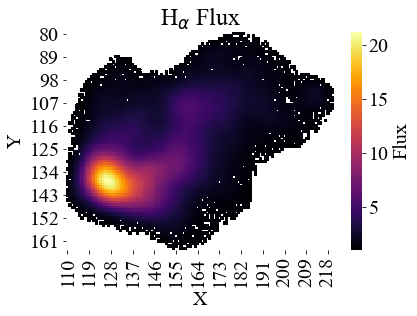

In [12]:
datal=data.copy()
#datal.I=np.log10(datal.I)
datal.X=datal.X.astype(int)
dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
#fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(dataH_f, cmap="inferno",xticklabels='auto',cbar_kws={'label': 'Flux'})
plt.title('H$_{α}$ Flux')
#plt.savefig('TAURUS/Imgs/A/'+reg+'FH.png')

Text(0.84, 0.08, '20 pc')

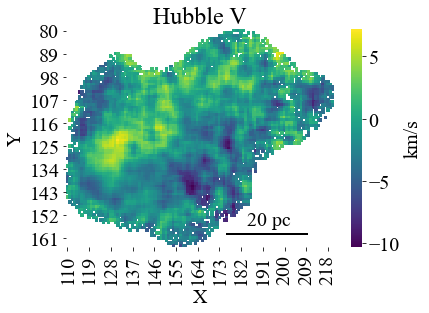

In [13]:
fig = plt.figure()
ax = fig.add_subplot()

datal=data.copy()

dataH_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
sns.heatmap(dataH_rv, cmap="viridis",cbar_kws={'label': 'km/s'})

plt.title('Hubble V')

plt.axhline(y=80, xmin=0.6, xmax=0.90, linewidth=2, color = 'k')

ax.text(0.84, 0.08, '20 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
#plt.savefig('TAURUS/Imgs/A/'+reg+'RVH.png')

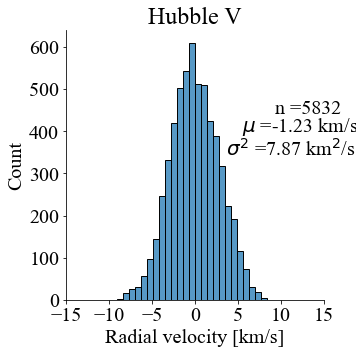

In [14]:
#fig, ax = plt.subplots()

sns.displot(data.RV-data.RV.mean(),bins=25)
plt.xlim(-15,15)

plt.text(0.95, 0.96,'n ='+str(data.RV.count()), ha='center', va='center', transform=ax.transAxes, color='k')
plt.text(0.92, 0.88,'$μ$ ='+str(np.round(data.RV.mean(),2))+' km/s', ha='center', va='center', transform=ax.transAxes, color='k')
plt.text(0.90, 0.78,'$σ^{2}$ ='+str(np.round(data.RV.var(),2))+' km$^{2}$/s$^{2}$', ha='center', va='center', transform=ax.transAxes, color='k')

plt.title('Hubble V')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="14"

plt.xlabel('Radial velocity [km/s]')
plt.savefig('Hist//Hubble V.pdf', bbox_inches='tight')

Structure function

Dr. Will

In [22]:
sb=np.array(dataH_f)

In [23]:
vv=np.array(dataH_rv)

In [24]:
# Replace spurious values in the arrays
m = ~np.isfinite(sb*vv) | (sb < 0.0)
sb[m] = 0.0
vv[m] = np.nanmean(vv)
sb /= sb.max()

<ipython-input-24-3dde98feae8a>:2: RuntimeWarning: invalid value encountered in less
  m = ~np.isfinite(sb*vv) | (sb < 0.0)


In [25]:
rslt = strucfunc.strucfunc_numba_parallel(vv, wmap=sb, dlogr=0.15)

In [26]:
good = (~m) & (sb > 0.001)
rslt["Unweighted mean velocity"] = np.mean(vv[good])
rslt["Unweighted sigma^2"] = np.var(vv[good])
v0w = rslt["Weighted mean velocity"] = np.average(vv, weights=sb)
rslt["Weighted sigma^2"] = np.average((vv - v0w)**2, weights=sb)

In [27]:
class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

In [28]:
jsonfilename = "SFdata//HV.json"
with open(jsonfilename, "w") as f:
    json.dump(rslt, fp=f, indent=3, cls=MyEncoder)
print(jsonfilename, end="")

SFdata//HV.json

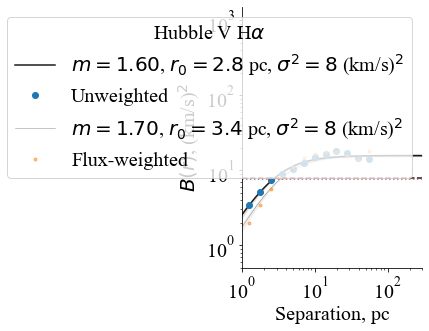

In [29]:
import json
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

def bfunc(r, r0, sig2, m):
    "Theoretical structure function"
    C = 1.0 / (1.0 + (r/r0)**m)
    return 2.0*sig2*(1 - C)

datax = json.load(open("SFdata//HV.json"))

sns.set_color_codes()
fig, ax = plt.subplots(figsize=(5, 5))

figfile = "HV.pdf"

pixscale = 0.26 # arcsec
pixscale *= 2.42              # parsec
r = pixscale * 10**np.array(datax["log10 r"])
B = np.array(datax["Unweighted B(r)"])
sig2 = datax["Unweighted sigma^2"]
B_w = np.array(datax["Weighted B(r)"])
sig2_w = datax["Weighted sigma^2"]

# Plot fit to unweighted strucfunc
rgrid = pixscale * np.logspace(0.0, 2.7)
r0 = np.interp(sig2, B, r)
m = 1.6
flabel = rf"$m = {m:.2f}$, $r_0 = {r0:.1f}$ pc, $\sigma^2 = {sig2:.0f}$ (km/s)$^2$"
ax.fill_between(
    rgrid,
    bfunc(rgrid, r0, sig2, m - 0.1),
    bfunc(rgrid, r0, sig2, m + 0.1),
    color="k", alpha=0.1,
)
ax.plot(rgrid, bfunc(rgrid, r0, sig2, m), color="k", label=flabel)

# Plot points from unweighted strucfunc
ax.plot(r, B, 'o', label="Unweighted")


# Plot fit to weighted strucfunc
r0_w = np.interp(sig2_w, B_w, r)
m_w = 1.7
flabel_w = rf"$m = {m_w:.2f}$, $r_0 = {r0_w:.1f}$ pc, $\sigma^2 = {sig2_w:.0f}$ (km/s)$^2$"
ax.fill_between(
    rgrid,
    bfunc(rgrid, r0_w, sig2_w, m_w - 0.1),
    bfunc(rgrid, r0_w, sig2_w, m_w + 0.1),
    color="k", alpha=0.05,
)
ax.plot(rgrid, bfunc(rgrid, r0_w, sig2_w, m_w), lw=0.5, color="k", alpha=0.5, label=flabel_w)

# Plot points from weighted strucfunc
ax.plot(r, B_w, 'o', ms=3, alpha=0.5, label="Flux-weighted")


#melnick_r = np.array([2.5, 7.5, 12.5, 17.5, 22.5, 27.5])
#melnick_B = np.array([2.0, 2.1, 2.2, 2.2, 2.25, 2.25]) * 18.2**2
#ax.plot(melnick_r, melnick_B, 's', label="Melnick+ (2020)", color="y", zorder=-10)


ax.axhline(sig2, color="k", ls="--")
ax.axhline(sig2_w, color="r", ls=":")
ax.legend(title=r"Hubble V H$\alpha$")
ax.set(
    xscale = "log",
    yscale = "log",
    ylim  = [0.5, 1500],
    xlim  = [1, 300],
    xlabel = "Separation, pc",
    ylabel = r"$B(r)$, (km/s)$^2$",
)
fig.tight_layout()
sns.despine()
#fig.savefig(figfile)
#fig.savefig(figfile.replace(".pdf", ".jpg"))

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="10"

Delta Variance

In [30]:
hdul = fits.open('Obs/HVRV.fits')
vmed = np.nanmedian(hdul[0].data)
m = np.isfinite(hdul[0].data)
hdul[0].data[~m] = vmed

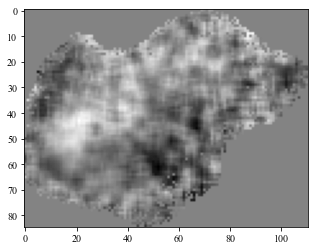

In [31]:
plt.imshow(hdul[0].data, cmap='gray')

In [32]:
dvar = tss.DeltaVariance(hdul[0])

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.788
Model:                            WLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     16.05
Date:                Fri, 18 Jun 2021   Prob (F-statistic):           0.000554
Time:                        19:19:47   Log-Likelihood:                 26.380
No. Observations:                  25   AIC:                            -48.76
Df Residuals:                      23   BIC:                            -46.32
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8437      0.097     -8.722      0.0

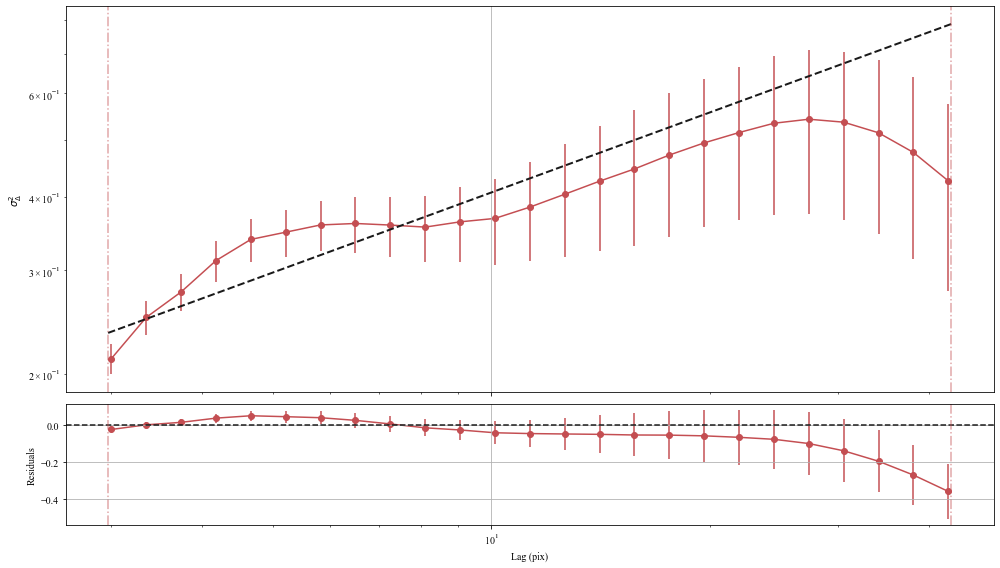

In [33]:
plt.figure(figsize=(14, 8))
dvar.run(verbose=True, boundary="fill")

In [54]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 183.3991310596466 seconds ---
